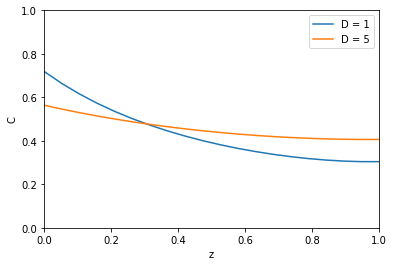

In [17]:
# The nonlinear solver fsolve is imported from scipy.optimize
from scipy.optimize import fsolve

def pfr_discr(y, A, B, dx, k, u, D, y0):
    length = y.shape[0] + 2
    ydot = np.ndarray(shape = (length))
    ydot[1:-1] = y
    ydot[0] = ydot[2] + 2.*dx*u/D*(y0 - ydot[1])
    ydot[-1] = y[-3]
    res = np.dot((-u*A/(2.*dx) + D*B/dx**2), ydot) - k*y**2
    return res

y0 = 1.0
y_init = np.zeros(shape = (points))

dx = 1./(points-1)
k = 10.
u = 4.
D = 1.

A = construct_conv_matrix_central_diff(points)
B = construct_diff_matrix_central_diff(points)

args = (A, B, dx, k, u, D, y0)
C = fsolve(pfr_discr, y_init, args)

D = 5.
args = (A, B, dx, k, u, D, y0)
C2 = fsolve(pfr_discr, y_init, args)

plot_profiles([C, C2], points, ["D = 1", "D = 5"])